In [1]:
## Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

In [2]:
## Load the Data

df = pd.read_csv('D:\The Machine Learning Company\Repositories\ml_mastery\Data/boston.csv')

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
## Shape of the data

df.shape

(506, 14)

In [6]:
## type of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
## Desciption of the dataset

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Data Visualization

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12

<Figure size 800x800 with 0 Axes>

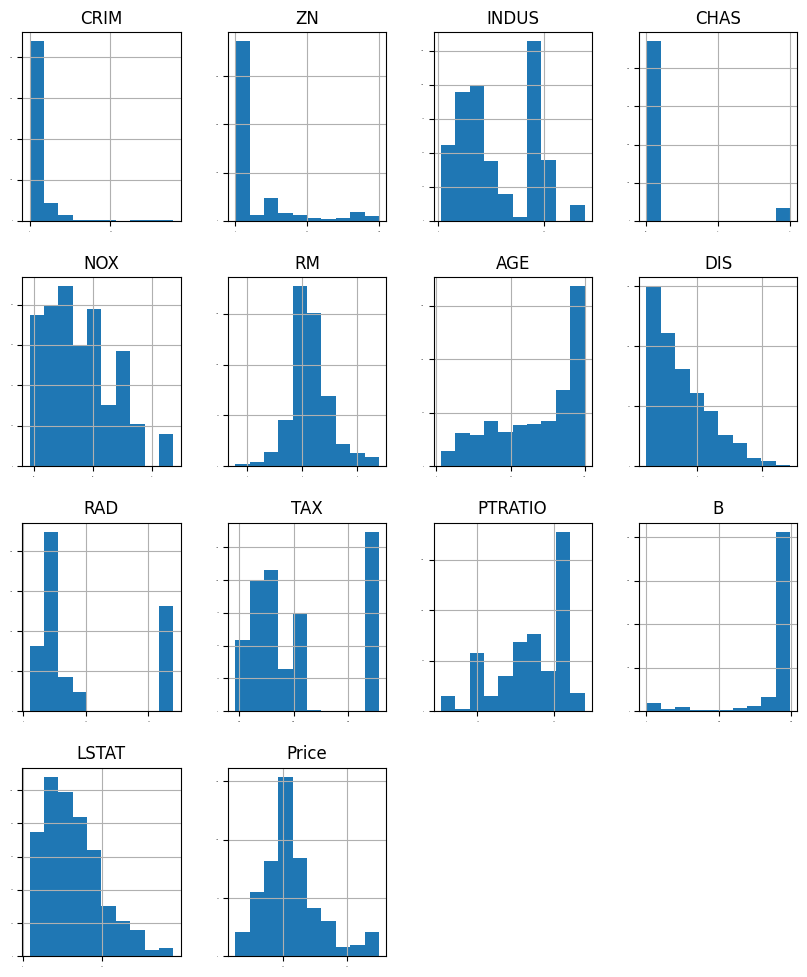

In [10]:
## Histogram 

plt.figure(figsize=(8,8))
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

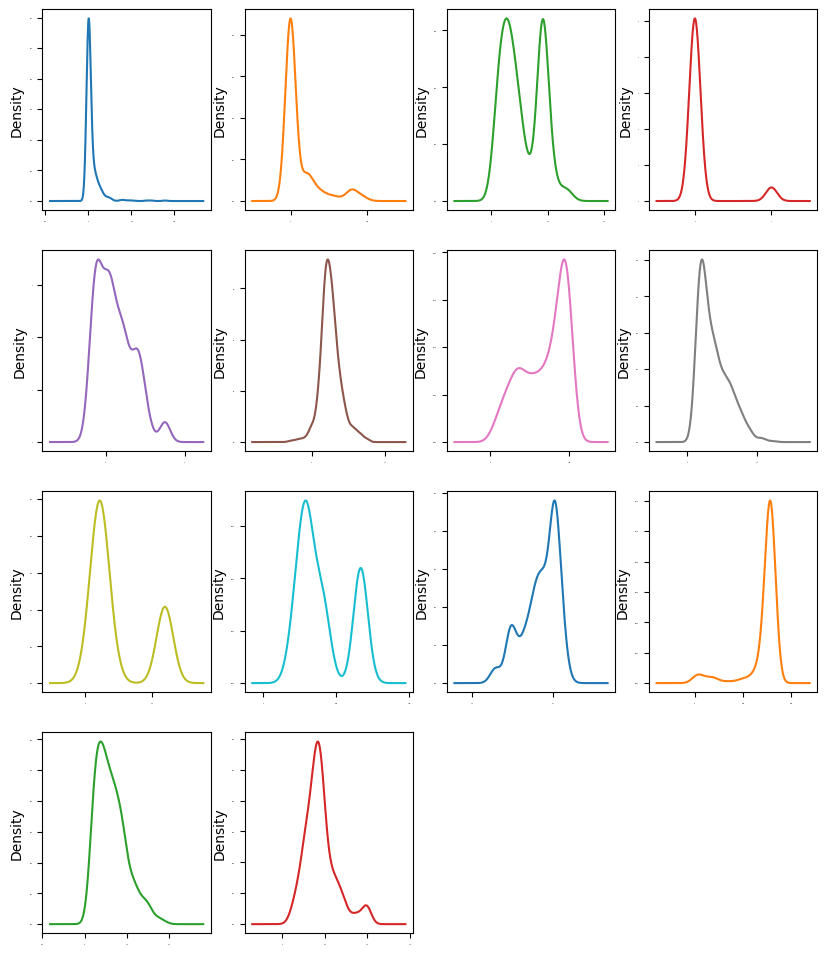

In [11]:
## Density plot

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, legend=False, fontsize=1)
plt.show()

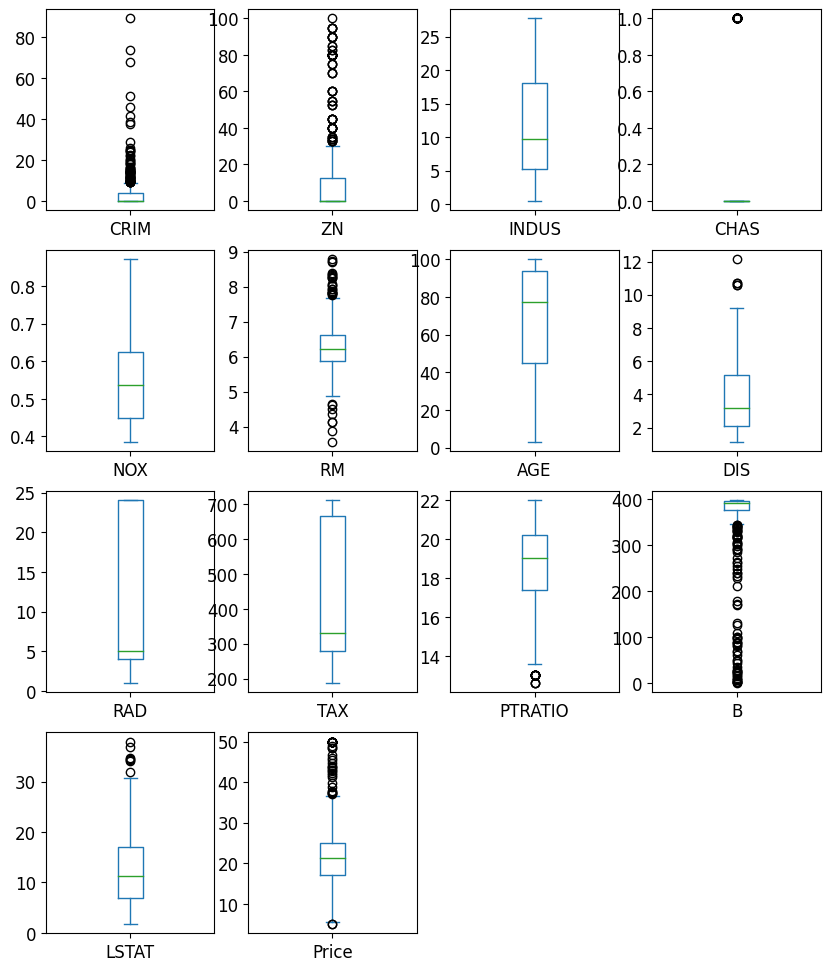

In [12]:
## whisker and Box plot

df.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=(12))
plt.show();

### MultiVariate Analysis

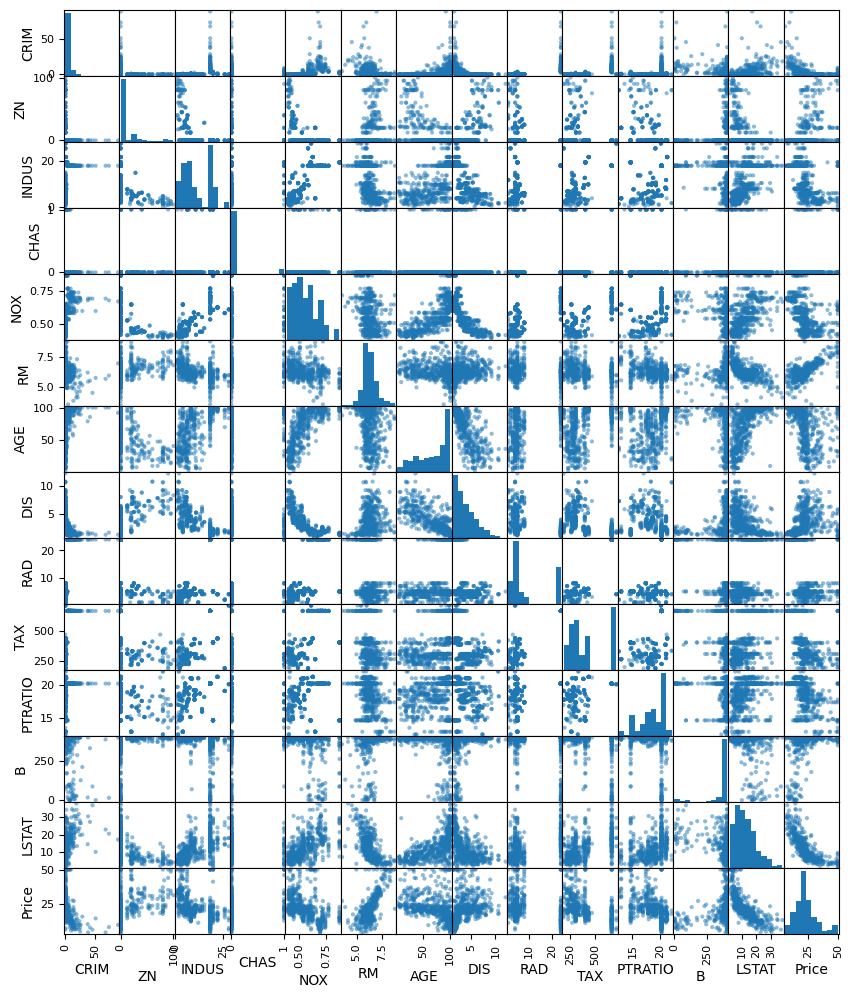

In [13]:
pd.plotting.scatter_matrix(df)
plt.show();

In [14]:
## Lets check the correlation matrix

corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


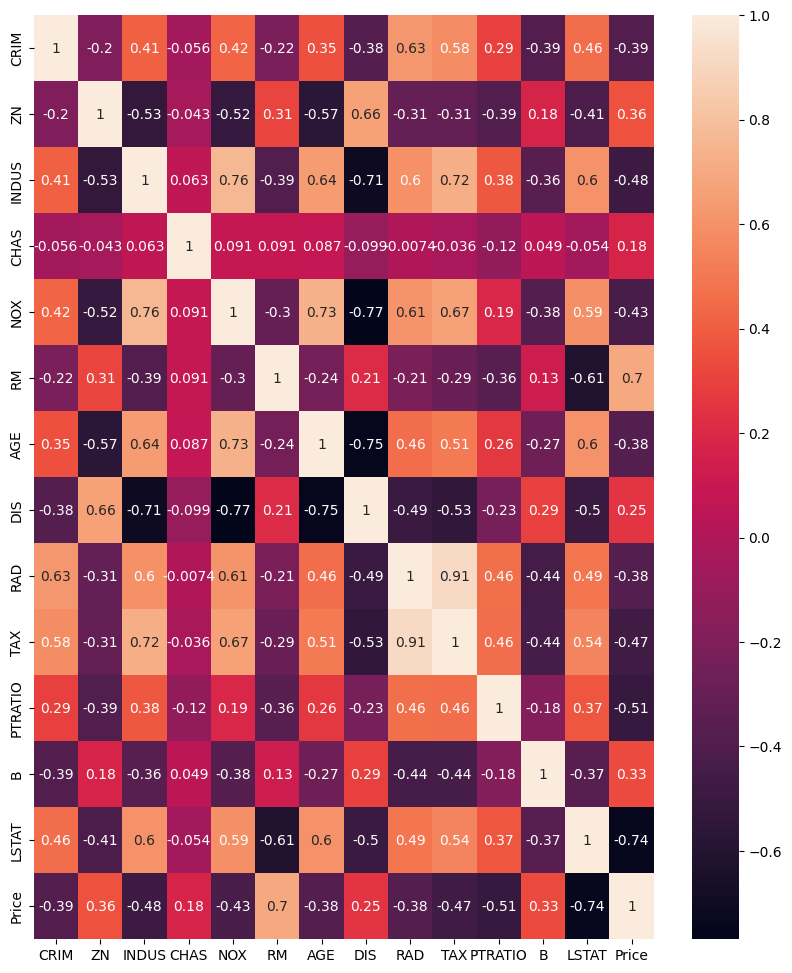

In [15]:
## Visualize this through Heatmap

sns.heatmap(data=corr_matrix, annot=True);

### Split the dataset

In [16]:
df.shape

(506, 14)

In [17]:
array = df.values
X = array[:, 0:13]
y = array[:, 13]

In [18]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [19]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [20]:
test_size = 0.20
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Evaluate Algorithms

In [21]:
## Spot check Algorithms

models = []
models.append(("Linear Regression : ", LinearRegression()))
models.append(('Lasso Regression : ', Lasso()))
models.append(('Ridge Regression : ', Ridge()))
models.append(("Elastic Net : ", ElasticNet()))
models.append(("KNN : ", KNeighborsRegressor()))
models.append(("Decision Tree : ", DecisionTreeRegressor()))
models.append(("SVM : ", SVR()))

In [22]:
## Evaluate each model in turn

results = []
names = []
scoring = "neg_mean_squared_error"

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('Linear Regression : ', -21.379855726678663, 9.414263656984714)
('Lasso Regression : ', -26.42356110840965, 11.651109915777916)
('Ridge Regression : ', -21.498161004501988, 9.473109345484485)
('Elastic Net : ', -27.50225935066171, 12.305022264112706)
('KNN : ', -41.89648839024391, 13.901688149849864)
('Decision Tree : ', -24.003125609756097, 9.676356974657244)
('SVM : ', -67.8278859731828, 29.049137595262604)


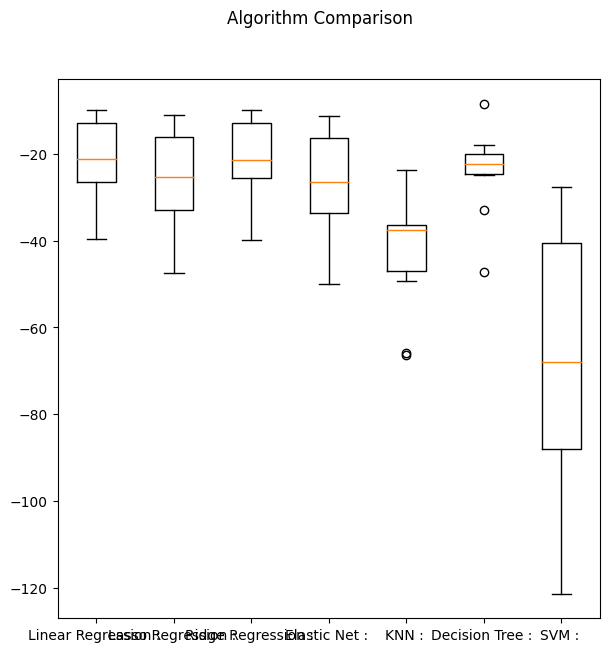

In [23]:
## Compare Algorithms

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Standardization of the dataset

In [24]:
pipelines = []

pipelines.append(('Scaled LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('Scaled LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('Scaled ElasticNet', Pipeline([('Scaler', StandardScaler()),('Elastic Net',ElasticNet())])))
pipelines.append(('Scaled KNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('Scaled Decision Tree', Pipeline([('Scaler', StandardScaler()),('Decision Tree',DecisionTreeRegressor())])))
pipelines.append(('Scaled SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))

In [25]:
results = []
names = []

for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('Scaled LR', -21.37985572667857, 9.414263656984712)
('Scaled LASSO', -26.607313557676616, 8.97876148589026)
('Scaled ElasticNet', -27.932372158135518, 10.587490490139404)
('Scaled KNN', -20.107620487804876, 12.376949150820472)
('Scaled Decision Tree', -27.11210243902439, 13.55668945730498)
('Scaled SVM', -29.633085500303213, 17.009186052351556)


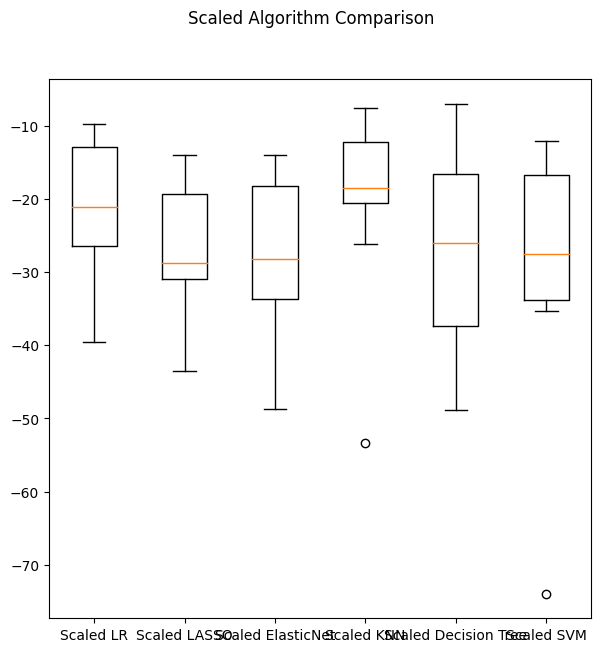

In [26]:
## Compare Algorithms

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Hyperparameter Tuning

In [27]:
## KNN Algorithm tuning 

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])

param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()

kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(rescaledX, y_train)

In [28]:
print("Best Score : ", (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print((mean, stdev, param))

Best Score :  (-18.10930386178861, {'n_neighbors': 3})
(-20.169640243902442, 14.986903589095084, {'n_neighbors': 1})
(-18.10930386178861, 12.880861011784255, {'n_neighbors': 3})
(-20.063115219512195, 12.138331105197853, {'n_neighbors': 5})
(-20.514296801891486, 12.278135599828225, {'n_neighbors': 7})
(-20.319535584161393, 11.554508789696914, {'n_neighbors': 9})
(-20.963145086676075, 11.540906942920092, {'n_neighbors': 11})
(-21.099039810939527, 11.870961990115173, {'n_neighbors': 13})
(-21.506842653116532, 11.468311063771333, {'n_neighbors': 15})
(-22.739137332264328, 11.499596087059038, {'n_neighbors': 17})
(-23.829011318491997, 11.277558018572918, {'n_neighbors': 19})
(-24.320892489353465, 11.849666867506965, {'n_neighbors': 21})


### Ensemble Methods

In [29]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AdaBoost', AdaBoostRegressor())])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GradientBoosting', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RandomForest', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ExtraTree', ExtraTreesRegressor())])))

In [30]:
results = []
names = []

for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('ScaledAB', -14.967991779626436, 6.083402350222118)
('ScaledGB', -10.11772304865951, 4.450152515261967)
('ScaledRF', -12.569229631097562, 6.67423476096724)
('ScaledET', -9.598228455609751, 5.923021563248076)


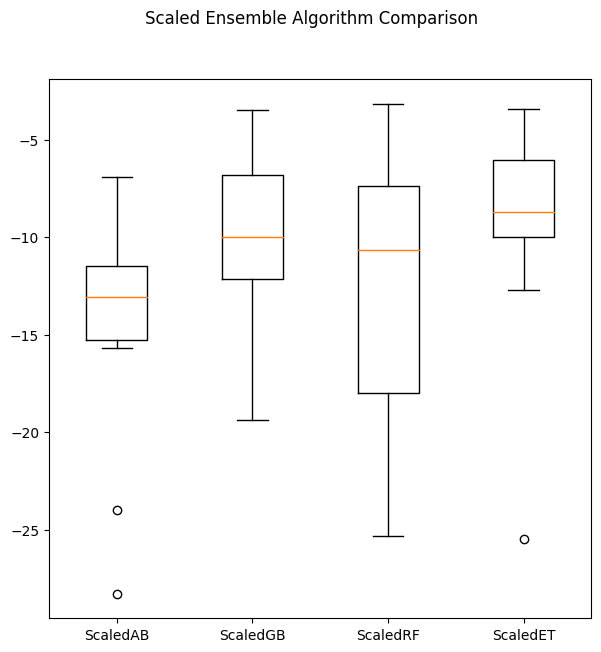

In [31]:
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

We must choose GB as the algorithm 

In [32]:
## Tune Scaled GB

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))

model = GradientBoostingRegressor()

kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [33]:
print("Best Score : ", (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print((mean, stdev, param))

Best Score :  (-9.354028200215536, {'n_estimators': 350})
(-10.847419115946632, 4.754218742159143, {'n_estimators': 50})
(-10.289189477830423, 4.711451189095212, {'n_estimators': 100})
(-9.719935000004037, 4.314614629033271, {'n_estimators': 150})
(-9.814100681788684, 4.43248410132637, {'n_estimators': 200})
(-9.627331273420225, 4.466593244825633, {'n_estimators': 250})
(-9.366364353843236, 4.3083654630907615, {'n_estimators': 300})
(-9.354028200215536, 4.222946085656217, {'n_estimators': 350})
(-9.452716757756372, 4.245414851925401, {'n_estimators': 400})


### Finalize Model

In [34]:
## Prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=300)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(n_estimators=300)

In [35]:
## Transform the validation dataset

rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
print(mean_squared_error(y_test, predictions))

11.259466006237835
